# Explore here

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
#get zip folder when you run this 

--2023-12-07 21:41:46--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 204.79.197.219
Connecting to download.microsoft.com (download.microsoft.com)|204.79.197.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  66.4MB/s    in 15s     

2023-12-07 21:42:02 (52.0 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [2]:
!unzip kagglecatsanddogs_5340.zip
#unzip folder

Archive:  kagglecatsanddogs_5340.zip
   creating: PetImages/Cat/
  inflating: PetImages/Cat/0.jpg     
  inflating: PetImages/Cat/1.jpg     
  inflating: PetImages/Cat/10.jpg    
  inflating: PetImages/Cat/100.jpg   
  inflating: PetImages/Cat/1000.jpg  
  inflating: PetImages/Cat/10000.jpg  
  inflating: PetImages/Cat/10001.jpg  
  inflating: PetImages/Cat/10002.jpg  
  inflating: PetImages/Cat/10003.jpg  
  inflating: PetImages/Cat/10004.jpg  
  inflating: PetImages/Cat/10005.jpg  
  inflating: PetImages/Cat/10006.jpg  
  inflating: PetImages/Cat/10007.jpg  
  inflating: PetImages/Cat/10008.jpg  
  inflating: PetImages/Cat/10009.jpg  
  inflating: PetImages/Cat/1001.jpg  
  inflating: PetImages/Cat/10010.jpg  
  inflating: PetImages/Cat/10011.jpg  
  inflating: PetImages/Cat/10012.jpg  
  inflating: PetImages/Cat/10013.jpg  
  inflating: PetImages/Cat/10014.jpg  
  inflating: PetImages/Cat/10015.jpg  
  inflating: PetImages/Cat/10016.jpg  
  inflating: PetImages/Cat/10017.jpg  
  inf

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
import PIL
from PIL import Image


2023-12-08 03:27:37.247660: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-08 03:27:39.078731: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 03:27:39.078790: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 03:27:39.110594: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 03:27:39.190873: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-08 03:27:39.191347: I tensorflow/core/platform/cpu_feature_guard.cc:1

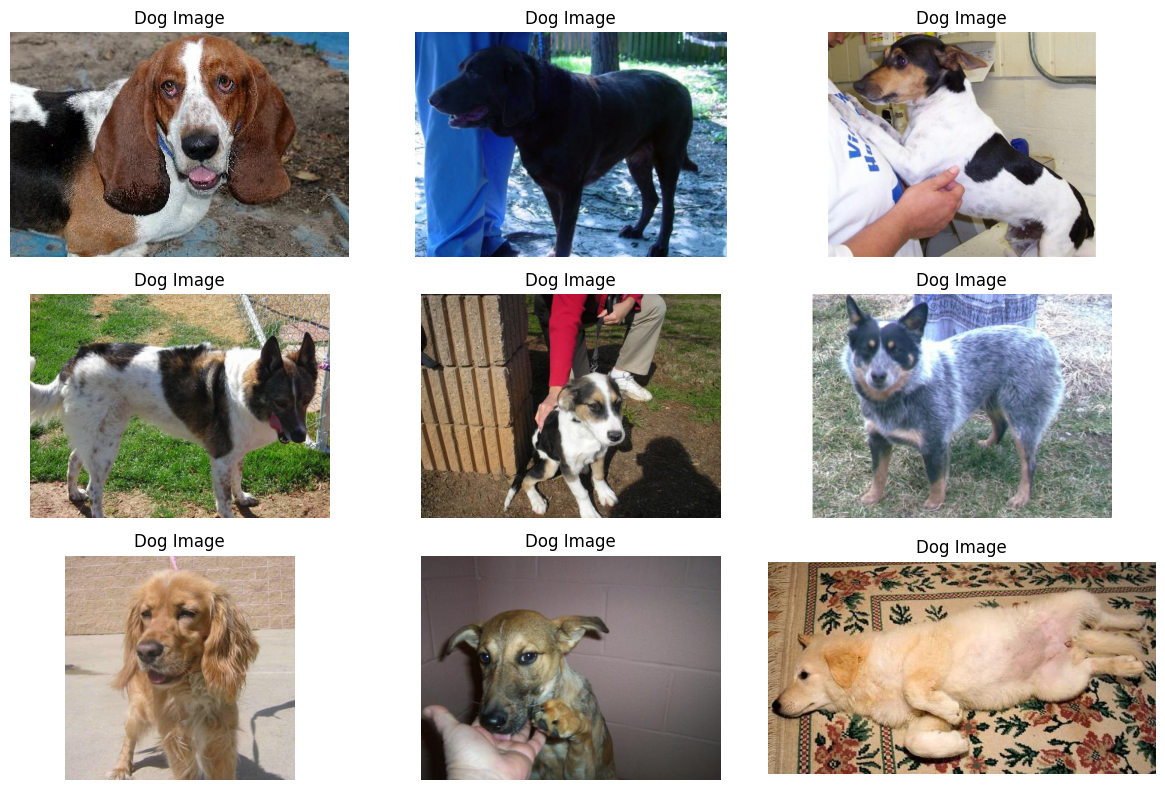

In [2]:
# Path to the directory containing your image data
data_dir = "../data/raw"

# Get a list of all dog image file names
dog_subfolder = os.path.join(data_dir, "Dog")

# Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()


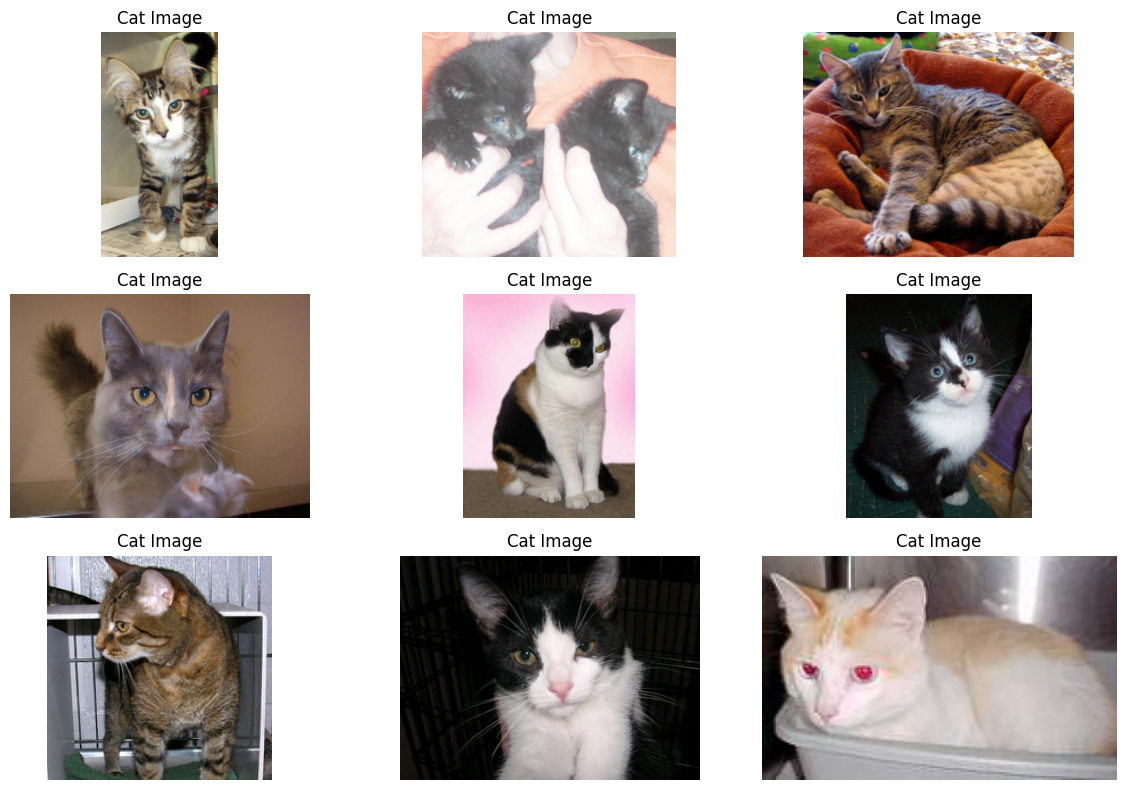

In [3]:
 #Import and Check first 9 Dog Pictures

# Path to the directory containing your image data
data_dir = "../data/raw"

# Get a list of all cat image file names
cats_subfolder = os.path.join(data_dir, "Cat")

# Get a list of all Cat image file names
cats_image_files = os.listdir(cats_subfolder)

# Load the first nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Create a single figure to display all cat images
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [13]:
from keras.preprocessing.image import ImageDataGenerator

# Define a few rules for DataGen
train_dir = "../data/raw"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["Dog", "Cat"] 
    
)

# Test Data Generation
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

Found 24998 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [5]:
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, GlobalAveragePooling2D
#import tensorflow as tf

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
#model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
#model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
#model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
#model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
#model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
#model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
#model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
#model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
#model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
#model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
#model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
#model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
#model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
#model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
#model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(GlobalAveragePooling2D())
#model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [6]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [19]:
folder_paths = [
    '/workspaces/machine-learning-python-template-ds-2023/data/raw/Cat',
    '/workspaces/machine-learning-python-template-ds-2023/data/raw/Dog',
    '/workspaces/machine-learning-python-template-ds-2023/data/raw/test/test'
]

In [20]:
# Identify and delete corrupted image in each of the folder file
for folder_path in folder_paths:
  for filename in os.listdir(folder_path):
      try:
          image = Image.open(os.path.join(folder_path, filename))
      except PIL.UnidentifiedImageError as e:
          print(f"Error in file {filename}: {e}")
          os.remove(os.path.join(folder_path, filename))
          print(f"Removed file {filename}")

In [17]:
# Train the Model
model.fit(train_data, epochs = 1, batch_size=64)

2023-12-08 02:05:04.651753: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15360000 exceeds 10% of free system memory.
2023-12-08 02:05:06.037786: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15360000 exceeds 10% of free system memory.
2023-12-08 02:05:06.048582: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.
2023-12-08 02:05:06.351402: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15360000 exceeds 10% of free system memory.
2023-12-08 02:05:06.446947: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15360000 exceeds 10% of free system memory.


782/782 [==============================] - 3729s 5s/step - loss: 0.7318 - accuracy: 0.5091


In [7]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

Epoch 1/3


2023-12-08 03:28:40.612765: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.
2023-12-08 03:28:40.813067: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.
2023-12-08 03:28:42.310489: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 163840000 exceeds 10% of free system memory.
2023-12-08 03:28:42.310599: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.
2023-12-08 03:28:42.733868: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.


100/100 [==============================] - ETA: 0s - loss: 1.0719 - accuracy: 0.5000
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ../models/vgg16_1.h5
100/100 [==============================] - 497s 5s/step - loss: 1.0719 - accuracy: 0.5000 - val_loss: 1.3865 - val_accuracy: 1.0000


/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.5153
Epoch 2: val_accuracy did not improve from 1.00000
100/100 [==============================] - 491s 5s/step - loss: 0.6914 - accuracy: 0.5153 - val_loss: 1.3865 - val_accuracy: 0.0000e+00
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5094
Epoch 3: val_accuracy did not improve from 1.00000
100/100 [==============================] - 496s 5s/step - loss: 0.6933 - accuracy: 0.5094 - val_loss: 1.3866 - val_accuracy: 1.0000


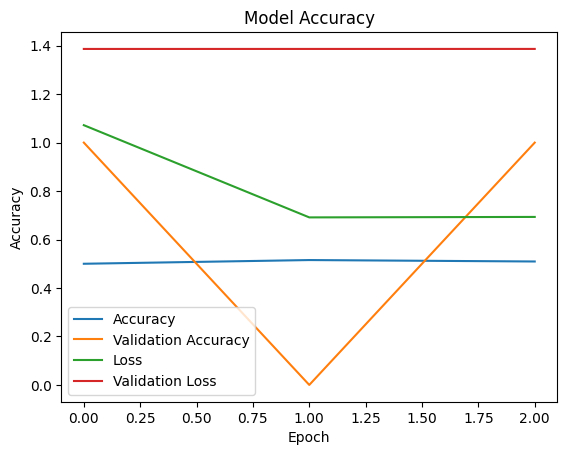

In [8]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

1/1 [==============================] - 0s 139ms/step
cat


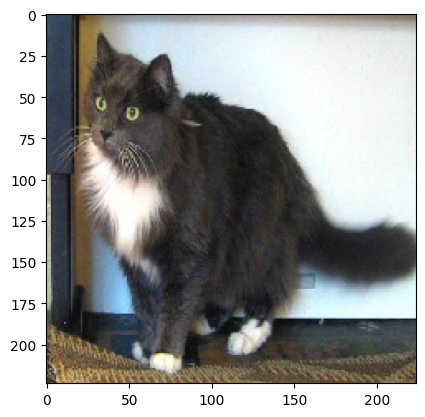

In [14]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test/test1/9.jpg", target_size = (224, 224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")